## Spinup for BR, PI_BC, and PI_ACBC runs

* total surface carbon, nitrate, and salinity 
* total 100m carbon, nitrate, and salinity
* to do- thalweg mass?

In [59]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [60]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [61]:
from __future__ import print_function
import matplotlib.pyplot as plt

import netCDF4 as nc
import numpy as np
import scipy as sp

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [62]:
BR_100 = nc.Dataset('./BR_2015_100m_massbal_comparison.nc')
BR_surf = nc.Dataset('./BR_2015_SPINUP_massbal_comparison.nc')

PI_ACBC_100 = nc.Dataset('./PI_ACBC_2015_100m_massbal_comparison.nc')
PI_ACBC_surf = nc.Dataset('./PI_ACBC_2015_SPINUP_massbal_comparison.nc')

PI_BC_100 = nc.Dataset('./PI_BC_2015_100m_massbal_comparison.nc')
PI_BC_surf = nc.Dataset('./PI_BC_2015_SPINUP_massbal_comparison.nc')

In [63]:
BR_100_dic_1st = BR_100['model_output']['surf_dic_1st'][:]
BR_100_dic_2nd = BR_100['model_output']['surf_dic_2nd'][:]
BR_100_nit_1st = BR_100['model_output']['surf_nit_1st'][:]
BR_100_nit_2nd = BR_100['model_output']['surf_nit_2nd'][:]
BR_100_sal_1st = BR_100['model_output']['surf_sal_1st'][:]
BR_100_sal_2nd = BR_100['model_output']['surf_sal_2nd'][:]

BR_surf_dic_1st = BR_surf['model_output']['surf_dic_1st'][:]
BR_surf_dic_2nd = BR_surf['model_output']['surf_dic_2nd'][:]
BR_surf_nit_1st = BR_surf['model_output']['surf_nit_1st'][:]
BR_surf_nit_2nd = BR_surf['model_output']['surf_nit_2nd'][:]
BR_surf_sal_1st = BR_surf['model_output']['surf_sal_1st'][:]
BR_surf_sal_2nd = BR_surf['model_output']['surf_sal_2nd'][:]

PI_ACBC_100_dic_1st = PI_ACBC_100['model_output']['surf_dic_1st'][:]
PI_ACBC_100_dic_2nd = PI_ACBC_100['model_output']['surf_dic_2nd'][:]
PI_ACBC_100_nit_1st = PI_ACBC_100['model_output']['surf_nit_1st'][:]
PI_ACBC_100_nit_2nd = PI_ACBC_100['model_output']['surf_nit_2nd'][:]
PI_ACBC_100_sal_1st = PI_ACBC_100['model_output']['surf_sal_1st'][:]
PI_ACBC_100_sal_2nd = PI_ACBC_100['model_output']['surf_sal_2nd'][:]

PI_ACBC_surf_dic_1st = PI_ACBC_surf['model_output']['surf_dic_1st'][:]
PI_ACBC_surf_dic_2nd = PI_ACBC_surf['model_output']['surf_dic_2nd'][:]
PI_ACBC_surf_nit_1st = PI_ACBC_surf['model_output']['surf_nit_1st'][:]
PI_ACBC_surf_nit_2nd = PI_ACBC_surf['model_output']['surf_nit_2nd'][:]
PI_ACBC_surf_sal_1st = PI_ACBC_surf['model_output']['surf_sal_1st'][:]
PI_ACBC_surf_sal_2nd = PI_ACBC_surf['model_output']['surf_sal_2nd'][:]

PI_BC_100_dic_1st = PI_BC_100['model_output']['surf_dic_1st'][:]
PI_BC_100_dic_2nd = PI_BC_100['model_output']['surf_dic_2nd'][:]
PI_BC_100_nit_1st = PI_BC_100['model_output']['surf_nit_1st'][:]
PI_BC_100_nit_2nd = PI_BC_100['model_output']['surf_nit_2nd'][:]
PI_BC_100_sal_1st = PI_BC_100['model_output']['surf_sal_1st'][:]
PI_BC_100_sal_2nd = PI_BC_100['model_output']['surf_sal_2nd'][:]

PI_BC_surf_dic_1st = PI_BC_surf['model_output']['surf_dic_1st'][:]
PI_BC_surf_dic_2nd = PI_BC_surf['model_output']['surf_dic_2nd'][:]
PI_BC_surf_nit_1st = PI_BC_surf['model_output']['surf_nit_1st'][:]
PI_BC_surf_nit_2nd = PI_BC_surf['model_output']['surf_nit_2nd'][:]
PI_BC_surf_sal_1st = PI_BC_surf['model_output']['surf_sal_1st'][:]
PI_BC_surf_sal_2nd = PI_BC_surf['model_output']['surf_sal_2nd'][:]

In [64]:
ts_BR = np.arange(0,len(BR_surf_sal_2nd),1)

# SURFACE SPINUP METRIC

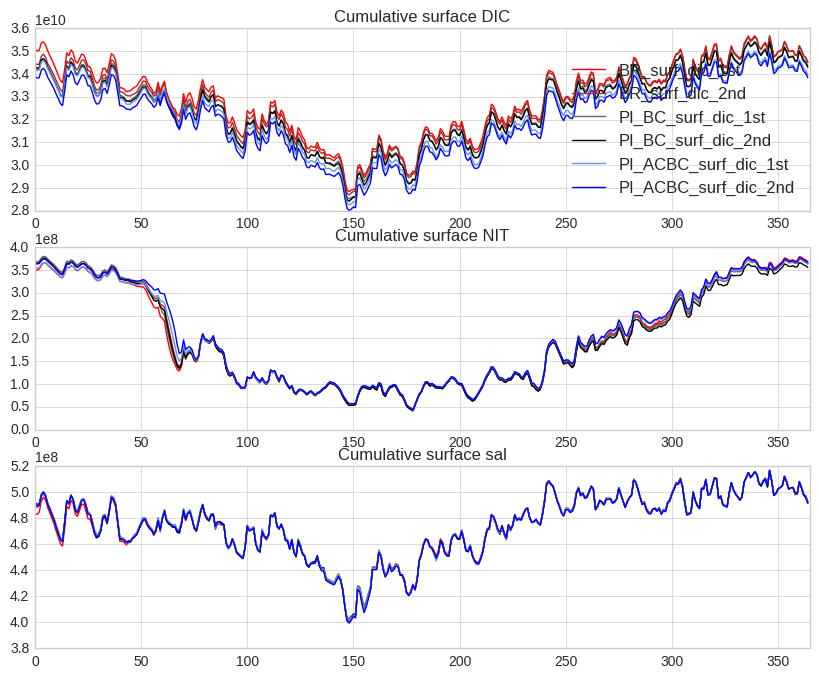

In [65]:
figstring = 'this'
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,BR_surf_dic_1st,color = 'red',label = 'BR_surf_dic_1st')
ax.plot(ts_BR,BR_surf_dic_2nd,color = 'brown', label = 'BR_surf_dic_2nd')

ax.plot(ts_BR,PI_BC_surf_dic_1st,color = 'dimgrey',label = 'PI_BC_surf_dic_1st')
ax.plot(ts_BR,PI_BC_surf_dic_2nd,color = 'black', label = 'PI_BC_surf_dic_2nd')

ax.plot(ts_BR,PI_ACBC_surf_dic_1st,color = 'cornflowerblue',label = 'PI_ACBC_surf_dic_1st')
ax.plot(ts_BR,PI_ACBC_surf_dic_2nd,color = 'blue', label = 'PI_ACBC_surf_dic_2nd')
ax.legend(loc = 'best')

plt.xlim([0,365])
plt.title('Cumulative surface DIC')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR,BR_surf_nit_1st,color = 'red',label = 'BR_surf_nit_1st')
ax.plot(ts_BR,BR_surf_nit_2nd,color = 'brown', label = 'BR_surf_nit_2nd')

ax.plot(ts_BR,PI_BC_surf_nit_1st,color = 'dimgrey',label = 'PI_BC_surf_nit_1st')
ax.plot(ts_BR,PI_BC_surf_nit_2nd,color = 'black', label = 'PI_BC_surf_nit_2nd')

ax.plot(ts_BR,PI_ACBC_surf_nit_1st,color = 'cornflowerblue',label = 'PI_ACBC_surf_nit_1st')
ax.plot(ts_BR,PI_ACBC_surf_nit_2nd,color = 'blue', label = 'PI_ACBC_surf_nit_2nd')
plt.xlim([0,365])
plt.title('Cumulative surface NIT')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR,BR_surf_sal_1st,color = 'red',label = 'BR_surf_sal_1st')
ax.plot(ts_BR,BR_surf_sal_2nd,color = 'brown', label = 'BR_surf_sal_2nd')

ax.plot(ts_BR,PI_BC_surf_sal_1st,color = 'dimgrey',label = 'PI_BC_surf_sal_1st')
ax.plot(ts_BR,PI_BC_surf_sal_2nd,color = 'black', label = 'PI_BC_surf_sal_2nd')

ax.plot(ts_BR,PI_ACBC_surf_sal_1st,color = 'cornflowerblue',label = 'PI_ACBC_surf_sal_1st')
ax.plot(ts_BR,PI_ACBC_surf_sal_2nd,color = 'blue', label = 'PI_ACBC_surf_sal_2nd')

plt.xlim([0,365])
plt.title('Cumulative surface sal')
plt.show()



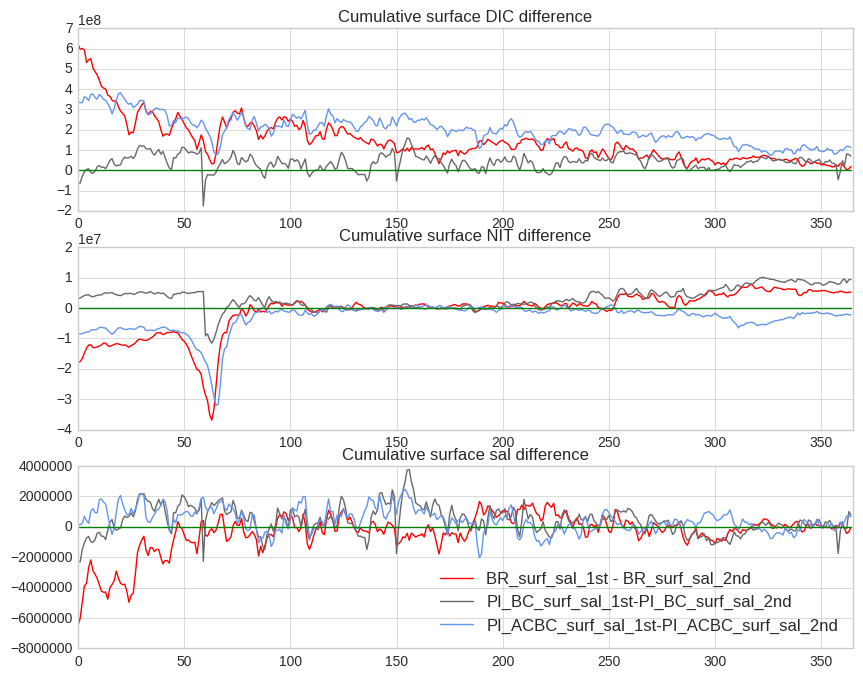

In [66]:
zer = np.zeros_like(ts_BR)
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,BR_surf_dic_1st - BR_surf_dic_2nd ,color = 'red',label = 'BR_surf_dic_1st - BR_surf_dic_2nd')
ax.plot(ts_BR,PI_BC_surf_dic_1st-PI_BC_surf_dic_2nd,color = 'dimgrey',label = 'PI_BC_surf_dic_1st-PI_BC_surf_dic_2nd')
ax.plot(ts_BR,PI_ACBC_surf_dic_1st-PI_ACBC_surf_dic_2nd,color = 'cornflowerblue',label = 'PI_ACBC_surf_dic_1st-PI_ACBC_surf_dic_2nd')

ax.plot(ts_BR,zer, color = 'green')


plt.xlim([0,365])
plt.title('Cumulative surface DIC difference')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR,BR_surf_nit_1st - BR_surf_nit_2nd ,color = 'red',label = 'BR_surf_nit_1st - BR_surf_nit_2nd')
ax.plot(ts_BR,PI_BC_surf_nit_1st-PI_BC_surf_nit_2nd,color = 'dimgrey',label = 'PI_BC_surf_nit_1st-PI_BC_surf_nit_2nd')
ax.plot(ts_BR,PI_ACBC_surf_nit_1st-PI_ACBC_surf_nit_2nd,color = 'cornflowerblue',label = 'PI_ACBC_surf_nit_1st-PI_ACBC_surf_nit_2nd')
ax.plot(ts_BR,zer, color = 'green')
plt.xlim([0,365])
plt.title('Cumulative surface NIT difference')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR,BR_surf_sal_1st - BR_surf_sal_2nd ,color = 'red',label = 'BR_surf_sal_1st - BR_surf_sal_2nd')
ax.plot(ts_BR,PI_BC_surf_sal_1st-PI_BC_surf_sal_2nd,color = 'dimgrey',label = 'PI_BC_surf_sal_1st-PI_BC_surf_sal_2nd')
ax.plot(ts_BR,PI_ACBC_surf_sal_1st-PI_ACBC_surf_sal_2nd,color = 'cornflowerblue',label = 'PI_ACBC_surf_sal_1st-PI_ACBC_surf_sal_2nd')
ax.plot(ts_BR,zer, color = 'green')
plt.xlim([0,365])
ax.legend(loc = 'best')
plt.title('Cumulative surface sal difference')
plt.show()




# 100m spinup metric

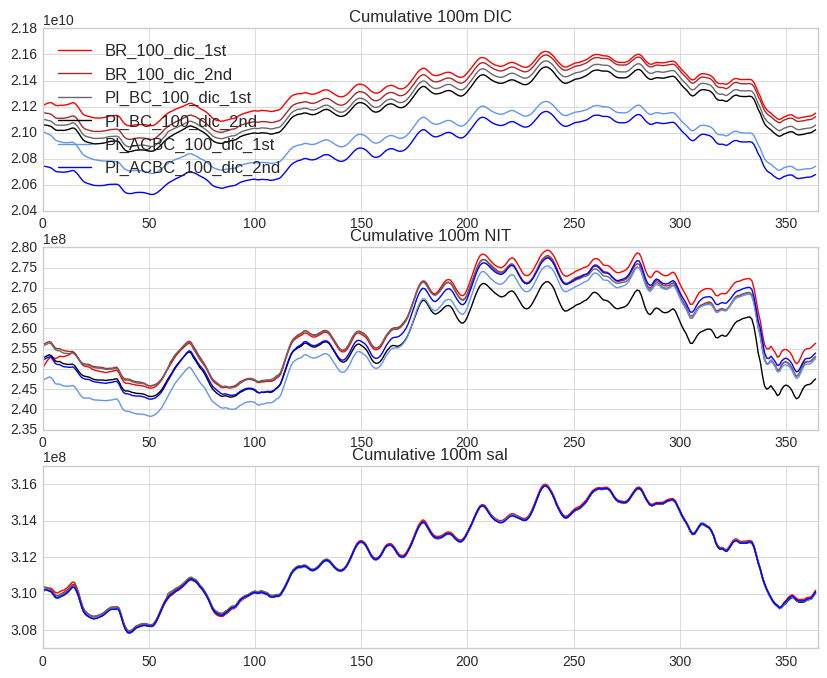

In [67]:
figstring = 'this'
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,BR_100_dic_1st,color = 'red',label = 'BR_100_dic_1st')
ax.plot(ts_BR,BR_100_dic_2nd,color = 'brown', label = 'BR_100_dic_2nd')

ax.plot(ts_BR,PI_BC_100_dic_1st,color = 'dimgrey',label = 'PI_BC_100_dic_1st')
ax.plot(ts_BR,PI_BC_100_dic_2nd,color = 'black', label = 'PI_BC_100_dic_2nd')

ax.plot(ts_BR,PI_ACBC_100_dic_1st,color = 'cornflowerblue',label = 'PI_ACBC_100_dic_1st')
ax.plot(ts_BR,PI_ACBC_100_dic_2nd,color = 'blue', label = 'PI_ACBC_100_dic_2nd')
ax.legend(loc = 'best')

plt.xlim([0,365])
plt.title('Cumulative 100m DIC')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR,BR_100_nit_1st,color = 'red',label = 'BR_100_nit_1st')
ax.plot(ts_BR,BR_100_nit_2nd,color = 'brown', label = 'BR_100_nit_2nd')

ax.plot(ts_BR,PI_BC_100_nit_1st,color = 'dimgrey',label = 'PI_BC_100_nit_1st')
ax.plot(ts_BR,PI_BC_100_nit_2nd,color = 'black', label = 'PI_BC_100_nit_2nd')

ax.plot(ts_BR,PI_ACBC_100_nit_1st,color = 'cornflowerblue',label = 'PI_ACBC_100_nit_1st')
ax.plot(ts_BR,PI_ACBC_100_nit_2nd,color = 'blue', label = 'PI_ACBC_100_nit_2nd')
plt.xlim([0,365])
plt.title('Cumulative 100m NIT')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR,BR_100_sal_1st,color = 'red',label = 'BR_100_sal_1st')
ax.plot(ts_BR,BR_100_sal_2nd,color = 'brown', label = 'BR_100_sal_2nd')

ax.plot(ts_BR,PI_BC_100_sal_1st,color = 'dimgrey',label = 'PI_BC_100_sal_1st')
ax.plot(ts_BR,PI_BC_100_sal_2nd,color = 'black', label = 'PI_BC_100_sal_2nd')

ax.plot(ts_BR,PI_ACBC_100_sal_1st,color = 'cornflowerblue',label = 'PI_ACBC_100_sal_1st')
ax.plot(ts_BR,PI_ACBC_100_sal_2nd,color = 'blue', label = 'PI_ACBC_100_sal_2nd')

plt.xlim([0,365])
plt.title('Cumulative 100m sal')
plt.show()



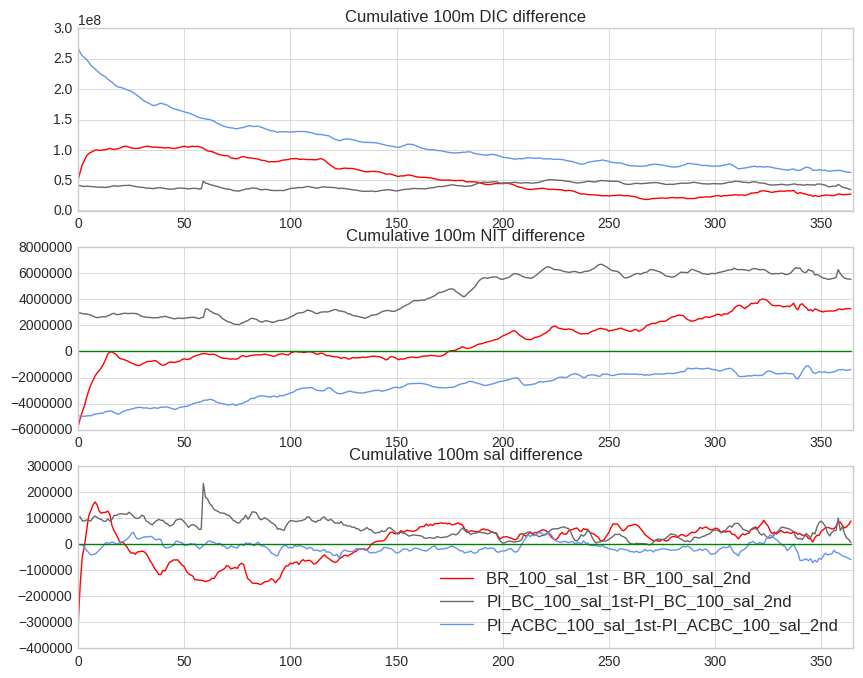

In [68]:
zer = np.zeros_like(ts_BR)
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,BR_100_dic_1st - BR_100_dic_2nd ,color = 'red',label = 'BR_100_dic_1st - BR_100_dic_2nd')
ax.plot(ts_BR,PI_BC_100_dic_1st-PI_BC_100_dic_2nd,color = 'dimgrey',label = 'PI_BC_100_dic_1st-PI_BC_100_dic_2nd')
ax.plot(ts_BR,PI_ACBC_100_dic_1st-PI_ACBC_100_dic_2nd,color = 'cornflowerblue',label = 'PI_ACBC_100_dic_1st-PI_ACBC_100_dic_2nd')

ax.plot(ts_BR,zer, color = 'green')


plt.xlim([0,365])
plt.title('Cumulative 100m DIC difference')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR,BR_100_nit_1st - BR_100_nit_2nd ,color = 'red',label = 'BR_100_nit_1st - BR_100_nit_2nd')
ax.plot(ts_BR,PI_BC_100_nit_1st-PI_BC_100_nit_2nd,color = 'dimgrey',label = 'PI_BC_100_nit_1st-PI_BC_100_nit_2nd')
ax.plot(ts_BR,PI_ACBC_100_nit_1st-PI_ACBC_100_nit_2nd,color = 'cornflowerblue',label = 'PI_ACBC_100_nit_1st-PI_ACBC_100_nit_2nd')
ax.plot(ts_BR,zer, color = 'green')
plt.xlim([0,365])
plt.title('Cumulative 100m NIT difference')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR,BR_100_sal_1st - BR_100_sal_2nd ,color = 'red',label = 'BR_100_sal_1st - BR_100_sal_2nd')
ax.plot(ts_BR,PI_BC_100_sal_1st-PI_BC_100_sal_2nd,color = 'dimgrey',label = 'PI_BC_100_sal_1st-PI_BC_100_sal_2nd')
ax.plot(ts_BR,PI_ACBC_100_sal_1st-PI_ACBC_100_sal_2nd,color = 'cornflowerblue',label = 'PI_ACBC_100_sal_1st-PI_ACBC_100_sal_2nd')
ax.plot(ts_BR,zer, color = 'green')
plt.xlim([0,365])
ax.legend(loc = 'best')
plt.title('Cumulative 100m sal difference')
plt.show()


